In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the data
excel_path = Path('/content/Sweden_Data.xlsx')
df = pd.read_excel(excel_path)

# Show the first few rows
df

,observation_date,CPI,GDP(SWK),short term interest rate,long term interest rate,unemployement rate(%)
0,1980-01-01,95.30,NaN,NaN,10.92,NaN
1,1980-02-01,96.80,NaN,NaN,11.24,NaN
2,1980-03-01,97.20,NaN,NaN,11.26,NaN
3,1980-04-01,97.90,NaN,NaN,11.33,NaN
4,1980-05-01,98.20,NaN,NaN,11.31,NaN
...,...,...,...,...,...,...
535,2024-08-01,413.78,,3.37,1.93,
536,2024-09-01,414.57,,3.14,1.93,
537,2024-10-01,415.51,1641259,2.92,2.04,8.466666
538,2024-11-01,416.75,,2.67,2.07,


In [ ]:
# indexing the data+removing NAs and gaps.

df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# Filter for only months: Jan, Apr, Jul, Oct (1, 4, 7, 10)
df_quarterly = df[df.index.month.isin([1, 4, 7, 10])]

# Reset index if needed
df_quarterly = df_quarterly.reset_index()

# Remove rows with any NaN values
df_cleaned = df_quarterly.dropna()
df_cleaned.set_index('observation_date', inplace=True)

df_cleaned

,CPI,GDP(SWK),short term interest rate,long term interest rate,unemployement rate(%)
observation_date,,,,,
1993-01-01,241.00,405577,9.81,10.17,7.7
1993-04-01,243.70,408963,9.53,9.44,9.033334
1993-07-01,241.90,417602,8.26,8.27,9.633333
1993-10-01,245.20,421416,7.50,7.59,9.8
1994-01-01,245.10,429283,7.01,7.05,9.733334
...,...,...,...,...,...
2023-10-01,409.07,1570442,3.96,3.02,8.066667
2024-01-01,412.74,1598162,3.97,2.23,8.233334
2024-04-01,415.50,1599110,3.95,2.51,8.3


In [ ]:
# mean+standard deviation for raw variables

# Calculate mean and standard deviation for each column
summary_stats = df_cleaned.iloc[:,0:].agg(['mean', 'std'])

# Display the summary statistics
summary_stats

,CPI,GDP(SWK),short term interest rate,long term interest rate,unemployement rate(%)
mean,300.232344,887787.140625,2.532813,3.668438,7.694792
std,41.761718,332493.142401,2.641872,2.825813,1.160825


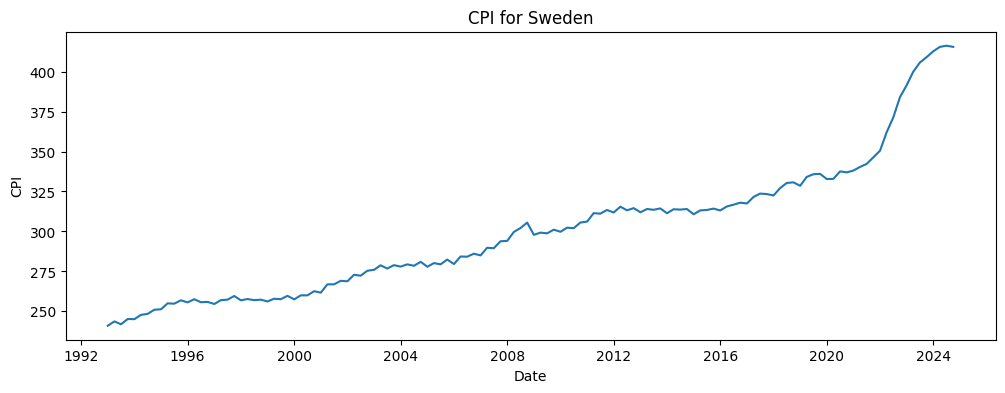

<Figure size 1200x400 with 0 Axes>

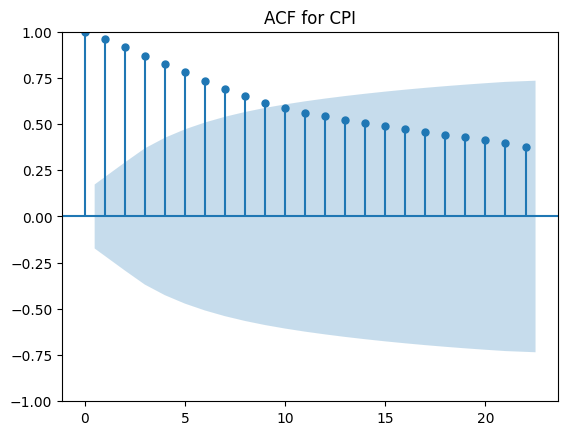

<Figure size 1200x400 with 0 Axes>

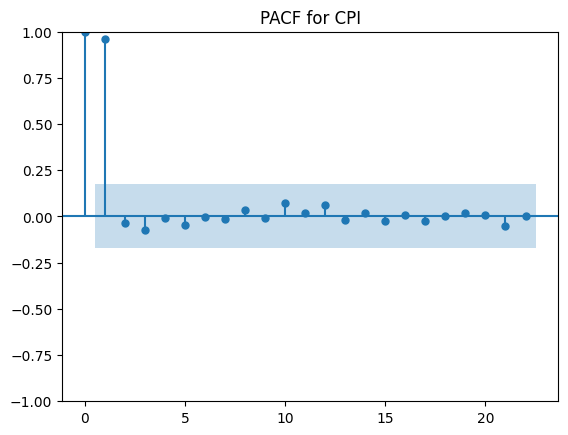

-------------------------- Correlogram for CPI --------------------------
    lag       ACF      PACF  Ljung-Box Q stat        p-value
0     1  0.959172  0.966725        120.543160   4.810866e-28
1     2  0.917001 -0.045830        231.594246   5.128004e-51
2     3  0.870884 -0.087922        332.557548   8.917018e-72
3     4  0.826055 -0.006849        424.126714   1.700447e-90
4     5  0.779229 -0.058903        506.271114  3.536625e-107
5     6  0.734468  0.000050        579.847619  5.178727e-122
6     7  0.690478 -0.016252        645.412015  4.021334e-135
7     8  0.651800  0.049948        704.323525  8.392089e-147
8     9  0.614615 -0.007351        757.145281  3.547255e-157
9    10  0.585677  0.097205        805.516627  1.344552e-166
10   11  0.559879  0.023821        850.098257  3.290331e-175
11   12  0.541497  0.084038        892.159969  2.771348e-183
12   13  0.522691 -0.029331        931.691721  8.071847e-191
13   14  0.507371  0.025605        969.266729  6.122805e-198
14   15  0.

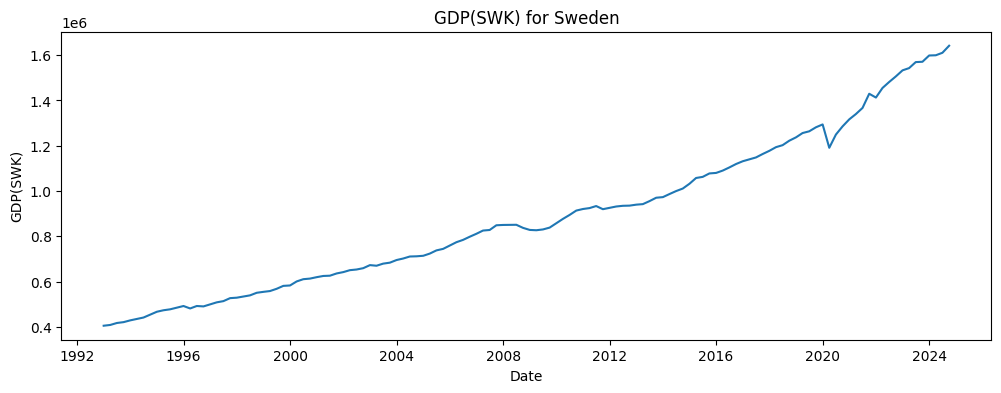

<Figure size 1200x400 with 0 Axes>

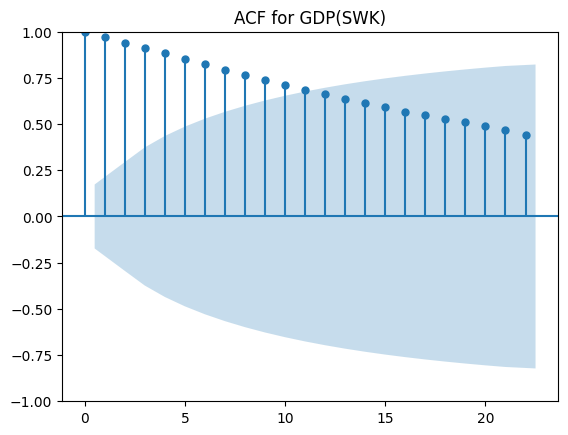

<Figure size 1200x400 with 0 Axes>

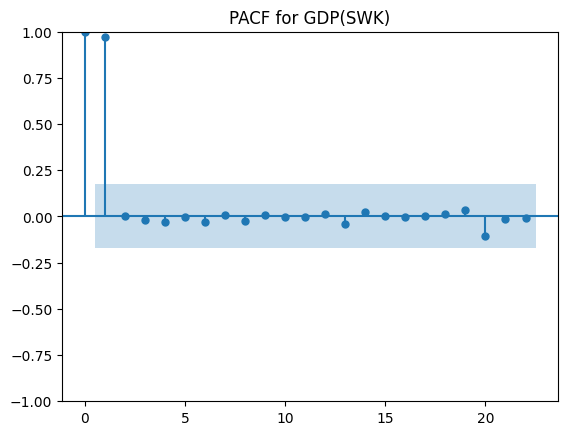

-------------------------- Correlogram for GDP(SWK) --------------------------
    lag       ACF      PACF  Ljung-Box Q stat        p-value
0     1  0.970049  0.977687        123.292536   1.203328e-28
1     2  0.941218  0.006481        240.286412   6.644597e-53
2     3  0.912235 -0.022032        351.065263   8.770262e-76
3     4  0.882346 -0.041034        455.539640   2.755642e-97
4     5  0.853334 -0.001028        554.050987  1.705491e-117
5     6  0.823597 -0.036779        646.568215  2.090843e-136
6     7  0.795174  0.009480        733.522658  4.073086e-154
7     8  0.766349 -0.030251        814.960218  1.227457e-170
8     9  0.738856  0.010976        891.295612  4.643660e-186
9    10  0.712080 -0.004431        962.799333  1.924018e-200
10   11  0.686046 -0.000796       1029.737454  7.637222e-214
11   12  0.661864  0.022740       1092.576913  2.300660e-226
12   13  0.635994 -0.060157       1151.104549  5.837577e-238
13   14  0.612481  0.033740       1205.860881  9.533310e-249
14   1

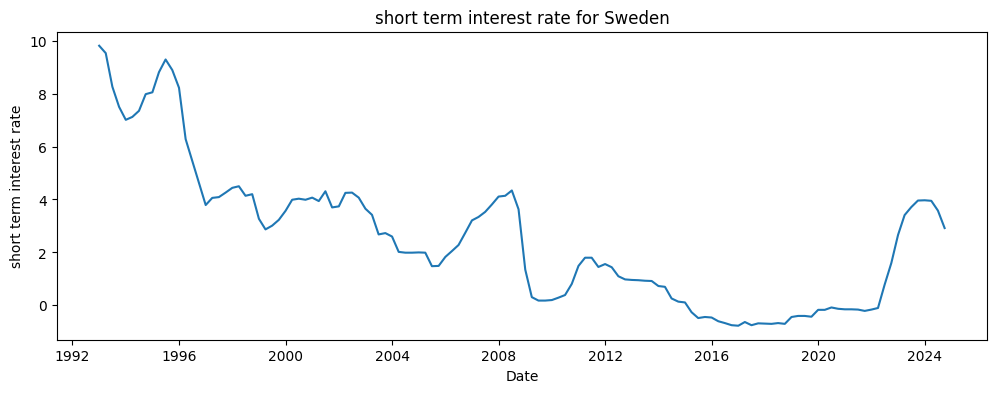

<Figure size 1200x400 with 0 Axes>

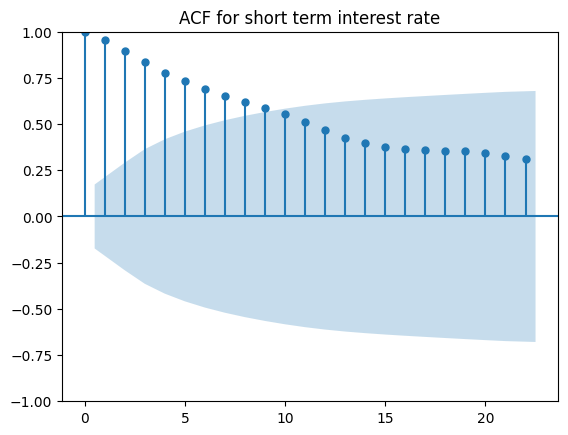

<Figure size 1200x400 with 0 Axes>

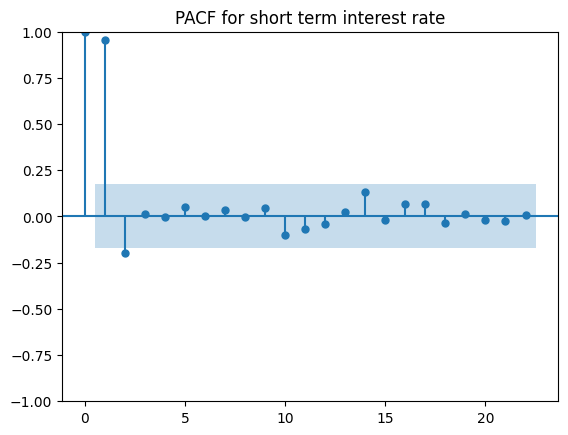

-------------------------- Correlogram for short term interest rate --------------------------
    lag       ACF      PACF  Ljung-Box Q stat        p-value
0     1  0.954601  0.962118        119.397047   8.573135e-28
1     2  0.893828 -0.237522        224.906341   1.452809e-49
2     3  0.834511  0.027691        317.612335   1.533231e-68
3     4  0.778692 -0.004156        398.982057   4.615747e-85
4     5  0.730871  0.065565        471.247408   1.280500e-99
5     6  0.687958 -0.002785        535.800547  1.623858e-112
6     7  0.650943  0.045215        594.071745  4.603243e-124
7     8  0.616946 -0.007638        646.851324  1.964385e-134
8     9  0.588377  0.060392        695.259414  7.227422e-144
9    10  0.554007 -0.137307        738.540893  3.324810e-152
10   11  0.512543 -0.074015        775.902741  2.821990e-159
11   12  0.467595 -0.051315        807.266992  4.574615e-165
12   13  0.425760  0.042412        833.496224  9.213737e-170
13   14  0.399418  0.177667        856.782732  7.79

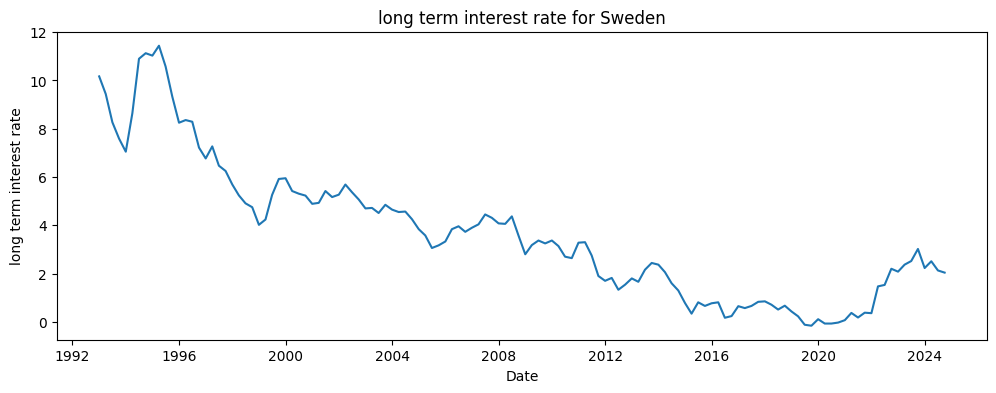

<Figure size 1200x400 with 0 Axes>

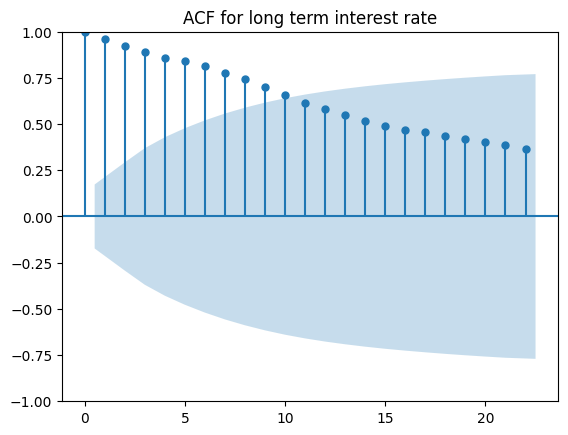

<Figure size 1200x400 with 0 Axes>

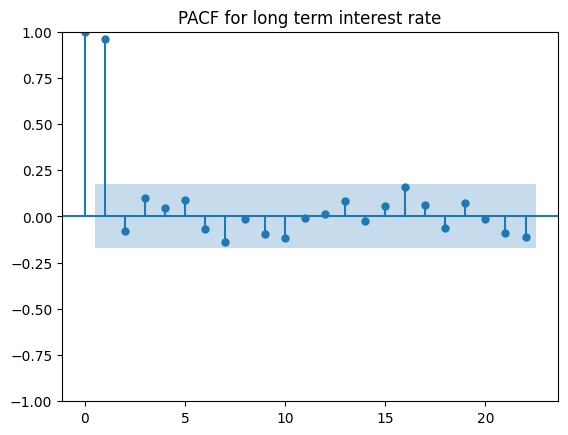

-------------------------- Correlogram for long term interest rate --------------------------
    lag       ACF      PACF  Ljung-Box Q stat        p-value
0     1  0.962597  0.970177        121.405648   3.114674e-28
1     2  0.920673 -0.101362        233.347901   2.133767e-51
2     3  0.887473  0.133133        338.194341   5.368262e-73
3     4  0.859816  0.051469        437.401492   2.297759e-93
4     5  0.839453  0.121990        532.734038  6.843862e-113
5     6  0.814825 -0.092414        623.291104  2.203614e-131
6     7  0.778766 -0.173882        706.694136  2.484966e-148
7     8  0.742120 -0.010815        783.063707  9.190911e-164
8     9  0.702409 -0.135934        852.053843  1.317705e-177
9    10  0.657801 -0.162616        913.072182  9.781321e-190
10   11  0.616571 -0.024850        967.139288  2.257526e-200
11   12  0.579255  0.016058       1015.271391  9.760866e-210
12   13  0.549312  0.123750       1058.932453  3.820823e-218
13   14  0.519265 -0.039420       1098.289819  1.244

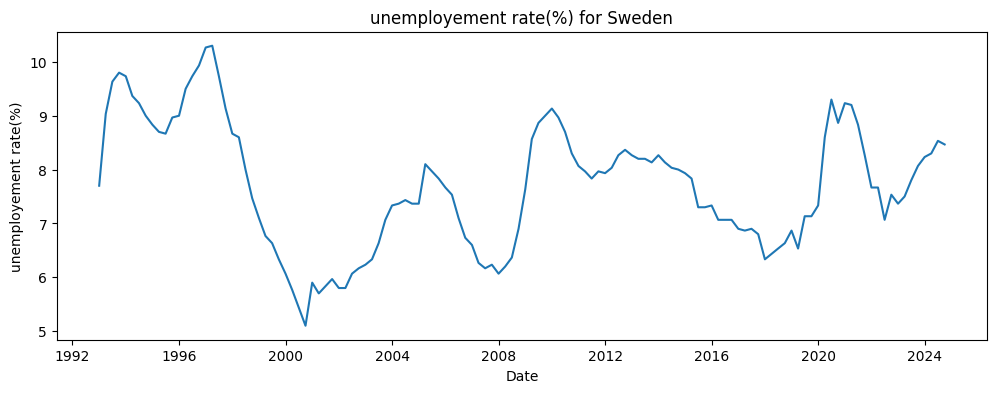

<Figure size 1200x400 with 0 Axes>

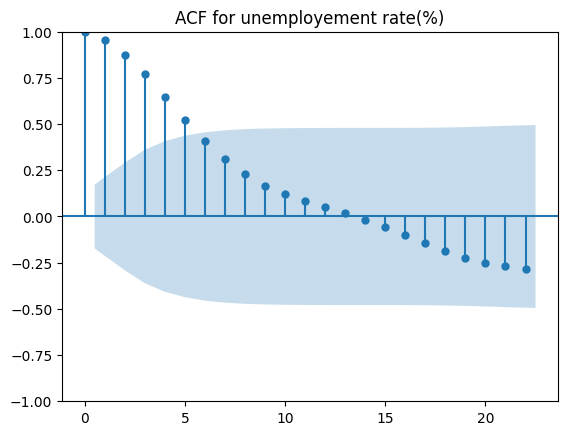

<Figure size 1200x400 with 0 Axes>

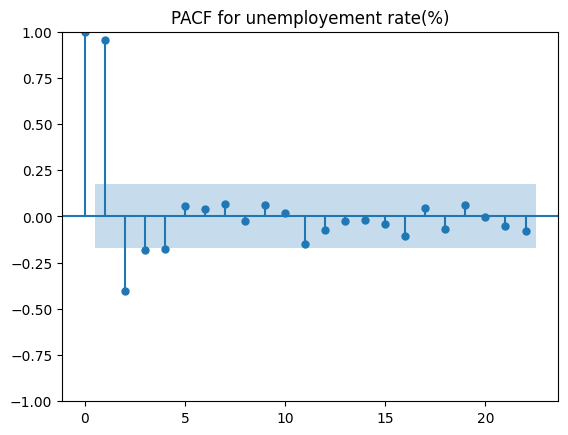

-------------------------- Correlogram for unemployement rate(%) --------------------------
    lag       ACF      PACF  Ljung-Box Q stat       p-value
0     1  0.953665  0.961174        119.162864  9.647424e-28
1     2  0.872824 -0.488239        219.771641  1.893191e-48
2     3  0.769442 -0.192483        298.584198  2.014586e-64
3     4  0.647034 -0.202939        354.764797  1.641176e-75
4     5  0.524504  0.117710        391.982147  1.585609e-82
5     6  0.410284  0.055438        414.941604  1.712561e-86
6     7  0.311607  0.094823        428.294696  2.028943e-88
7     8  0.228556 -0.057440        435.538345  4.633237e-89
8     9  0.166334  0.084960        439.407055  5.268631e-89
9    10  0.123770  0.007777        441.567281  1.313540e-88
10   11  0.085785 -0.216617        442.613908  5.371714e-88
11   12  0.050830 -0.091943        442.984535  2.914824e-87
12   13  0.017732 -0.018194        443.030032  1.772628e-86
13   14 -0.017391  0.011065        443.074181  1.034854e-85
14   15 

In [ ]:
#ACF and PACF for raw variables

raw_variables = df_cleaned.copy()


# Plot each variable in a separate figure
for var in raw_variables.columns:
        y = raw_variables[var]

        # Plot the level
        plt.figure(figsize=(12, 4))
        plt.plot(y)
        plt.title(f'{var} for Sweden')
        plt.ylabel(var)
        plt.xlabel('Date')
        plt.show()

        # Plot ACF
        plt.figure(figsize=(12, 4))
        plot_acf(y)
        plt.title(f'ACF for {var}')
        plt.show()

        # Plot PACF
        plt.figure(figsize=(12, 4))
        plot_pacf(y, method='ywm')
        plt.title(f'PACF for {var}')
        plt.show()

        # Create and print correlogram
        lagnum = 24
        acf, q, pval = tsa.acf(y, nlags=lagnum, qstat=True)
        pacf = tsa.pacf(y, nlags=lagnum)
        correlogram = pd.DataFrame({
            'lag': list(range(1, lagnum + 1)),
            'ACF': acf[1:],
            'PACF': pacf[1:],
            'Ljung-Box Q stat': q,
            'p-value': pval
        })

        print(f"-------------------------- Correlogram for {var} --------------------------")
        print(correlogram)
        print("-----------------------------------------------------------------")

In [ ]:
for var in raw_variables.columns:
    y = raw_variables[var].dropna()  # Drop NaN values before ADF test

    print("-----------------------------------------------------------------")
    print(f"Augmented Dickey-Fuller (ADF) test for {var}")
    print("    H0: unit root (variable is NOT stationary)")
    print("    H1: no unit root (variable is stationary)")
    print("-----------------------------------------------------------------")
    results = tsa.adfuller(y)
    print("\n (1) ADF test for", var, "series")
    print('ADF test stat: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Critical values:')
    for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value))

    print("-----------------------------------------------------------------")
    print(f"\n (2) ADF test for {var} series - various underlying models:")
    res = tsa.adfuller(y, regression='c', autolag='AIC')
    print(f"    (1) ADF p-value (const):                       {res[1]:.4f}")
    res = tsa.adfuller(y, regression='ct', autolag='AIC')
    print(f"    (2) ADF p-value (const + trend):               {res[1]:.4f}")
    res = tsa.adfuller(y, regression='ctt', autolag='AIC')
    print(f"    (3) ADF p-value (const + trend + quad trend):   {res[1]:.4f}")
    res = tsa.adfuller(y, regression='n', autolag='AIC')
    print(f"    (4) ADF p-value (no const + no trend):         {res[1]:.4f}")
    print("-----------------------------------------------------------------")

-----------------------------------------------------------------
Augmented Dickey-Fuller (ADF) test for CPI
    H0: unit root (variable is NOT stationary)
    H1: no unit root (variable is stationary)
-----------------------------------------------------------------

 (1) ADF test for CPI series
ADF test stat: 1.747868
p-value: 0.998240
Critical values:
	1%: -3.489
	5%: -2.887
	10%: -2.580
-----------------------------------------------------------------

 (2) ADF test for CPI series - various underlying models:
    (1) ADF p-value (const):                       0.9982
    (2) ADF p-value (const + trend):               0.9919
    (3) ADF p-value (const + trend + quad trend):   0.9959
    (4) ADF p-value (no const + no trend):         0.9952
-----------------------------------------------------------------
-----------------------------------------------------------------
Augmented Dickey-Fuller (ADF) test for GDP(SWK)
    H0: unit root (variable is NOT stationary)
    H1: no unit root 

In [ ]:
# Transformations of raw variables


# Choosing the base CPI
transformed_variables = raw_variables.copy()
cpi_base = transformed_variables['CPI'].iloc[0]

# Step 1: Calculate real GDP
transformed_variables['real_GDP'] = transformed_variables['GDP(SWK)'] / (transformed_variables['CPI'] / cpi_base)

# Step 1: Calculate annualized inflation rate (π_t)
transformed_variables['inflation'] = 4 * (transformed_variables['CPI'] - transformed_variables['CPI'].shift(1)) / transformed_variables['CPI'].shift(1)

# Step 2: Calculate term spread (TS_t)
transformed_variables['term_spread'] = transformed_variables['long term interest rate'] - transformed_variables['short term interest rate']

# Step 3: Calculate real short-term interest rate (realSR_t)
transformed_variables['real_short_rate'] = (1 + transformed_variables['short term interest rate']) / (1 + transformed_variables['inflation']) - 1



# Step 2: Calculate short-term economic growth (1 quarter ahead, annualized)
transformed_variables['Yt+1'] = transformed_variables['real_GDP'].shift(-1)
transformed_variables['Zt+4'] = transformed_variables['real_GDP'].shift(-4)

# Calculate the ratio of Yt+1/real_gdp, dropping NaNs
transformed_variables['Yt+1_ratio'] = (transformed_variables['Yt+1'] / transformed_variables['real_GDP']).dropna()

# Calculate the ratio of Zt+4/realgdp, dropping NaNs
transformed_variables['Zt+4_ratio'] = (transformed_variables['Zt+4'] / transformed_variables['real_GDP']).dropna()

# Replace Python None with proper np.nan
transformed_variables = transformed_variables.replace({None: np.nan})


transformed_variables['short-term economic growth'] = 400 * np.log(transformed_variables['Yt+1_ratio'])
transformed_variables['long-term economic growth'] = 100 * np.log(transformed_variables['Zt+4_ratio'])

Transformed_Variables = transformed_variables.iloc[:, [4, 5, 7, 8, 13,14]]

Transformed_Variables


<ipython-input-18-9ad4759e7959>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_variables = transformed_variables.replace({None: np.nan})


,unemployement rate(%),real_GDP,term_spread,real_short_rate,short-term economic growth,long-term economic growth
observation_date,,,,,,
1993-01-01,7.700000,405577.000000,0.36,NaN,-1.130834,3.993627
1993-04-01,9.033334,404432.018876,-0.09,9.078356,11.327073,4.594267
1993-07-01,9.633333,416048.292683,0.01,8.541911,-1.783257,2.956352
1993-10-01,9.800000,414197.618271,0.09,7.060172,7.561528,5.231531
1994-01-01,9.733334,422102.011424,0.04,7.023088,1.271726,5.985038
...,...,...,...,...,...,...
2023-10-01,8.066667,925212.120175,-0.94,3.799111,3.426219,2.848613
2024-01-01,8.233334,933171.105296,-1.74,3.797824,-2.428702,NaN
2024-04-01,8.300000,927522.286402,-1.44,3.821046,2.054786,NaN


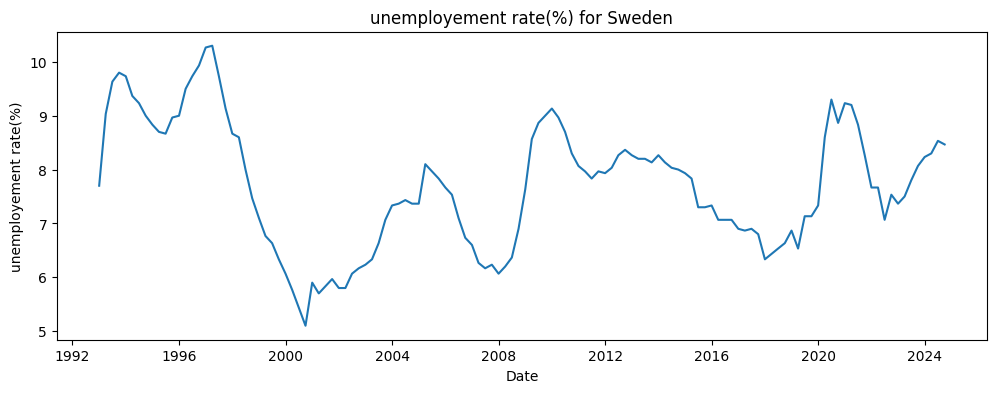

<Figure size 1200x400 with 0 Axes>

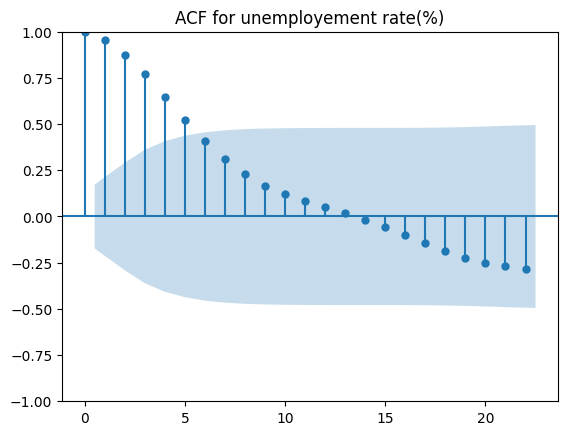

<Figure size 1200x400 with 0 Axes>

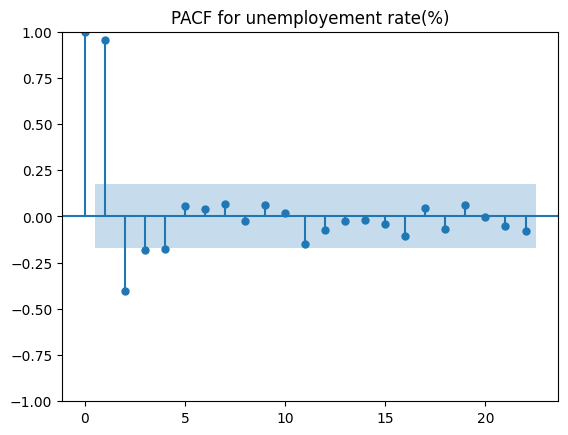

-------------------------- Correlogram for unemployement rate(%) --------------------------
    lag       ACF      PACF  Ljung-Box Q stat       p-value
0     1  0.953665  0.961174        119.162864  9.647424e-28
1     2  0.872824 -0.488239        219.771641  1.893191e-48
2     3  0.769442 -0.192483        298.584198  2.014586e-64
3     4  0.647034 -0.202939        354.764797  1.641176e-75
4     5  0.524504  0.117710        391.982147  1.585609e-82
5     6  0.410284  0.055438        414.941604  1.712561e-86
6     7  0.311607  0.094823        428.294696  2.028943e-88
7     8  0.228556 -0.057440        435.538345  4.633237e-89
8     9  0.166334  0.084960        439.407055  5.268631e-89
9    10  0.123770  0.007777        441.567281  1.313540e-88
10   11  0.085785 -0.216617        442.613908  5.371714e-88
11   12  0.050830 -0.091943        442.984535  2.914824e-87
12   13  0.017732 -0.018194        443.030032  1.772628e-86
13   14 -0.017391  0.011065        443.074181  1.034854e-85
14   15 

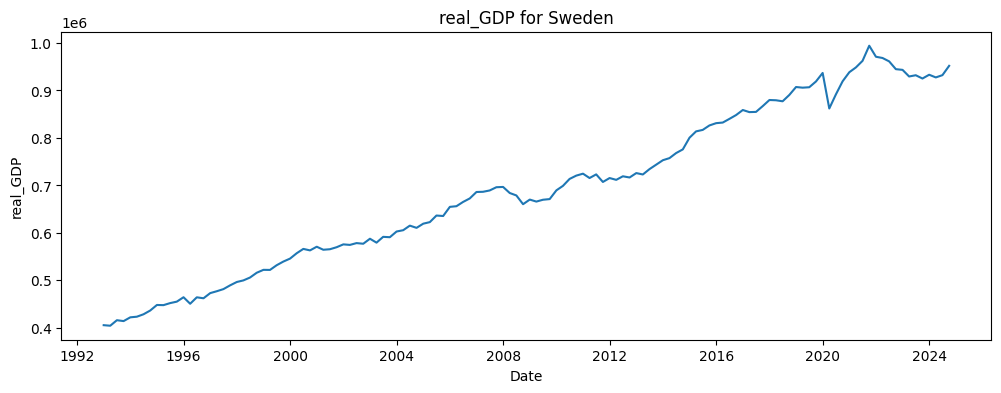

<Figure size 1200x400 with 0 Axes>

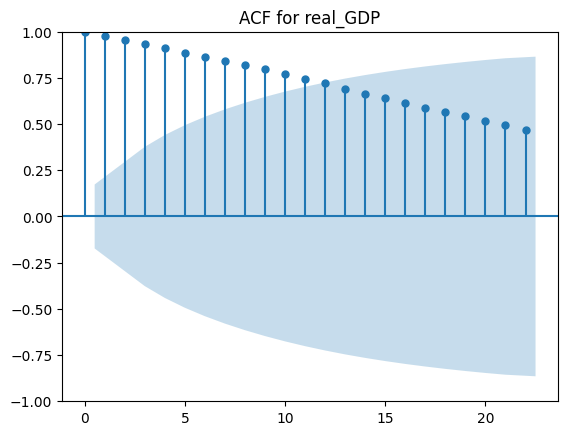

<Figure size 1200x400 with 0 Axes>

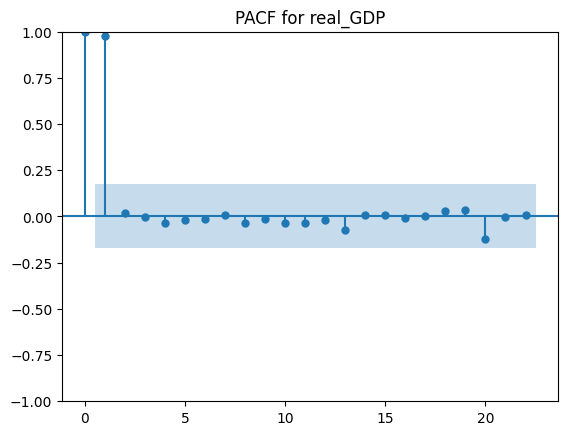

-------------------------- Correlogram for real_GDP --------------------------
    lag       ACF      PACF  Ljung-Box Q stat        p-value
0     1  0.976661  0.984351        124.979043   5.143505e-29
1     2  0.954699  0.029172        245.348357   5.287876e-54
2     3  0.933042 -0.003422        361.238391   5.496857e-78
3     4  0.910244 -0.052628        472.423594  6.161072e-101
4     5  0.887278 -0.025404        578.928068  7.217247e-123
5     6  0.864160 -0.023677        680.782935  8.616743e-144
6     7  0.842033  0.017094        778.287791  8.983482e-164
7     8  0.818681 -0.056051        871.227635  9.067151e-183
8     9  0.795413 -0.017976        959.696800  8.431026e-201
9    10  0.771080 -0.059578       1043.540415  7.782512e-218
10   11  0.745681 -0.059027       1122.621782  7.617734e-234
11   12  0.720182 -0.029837       1197.022977  7.578471e-249
12   13  0.691878 -0.121798       1266.288106  9.590892e-263
13   14  0.664873  0.012399       1330.812776  1.267053e-275
14   1

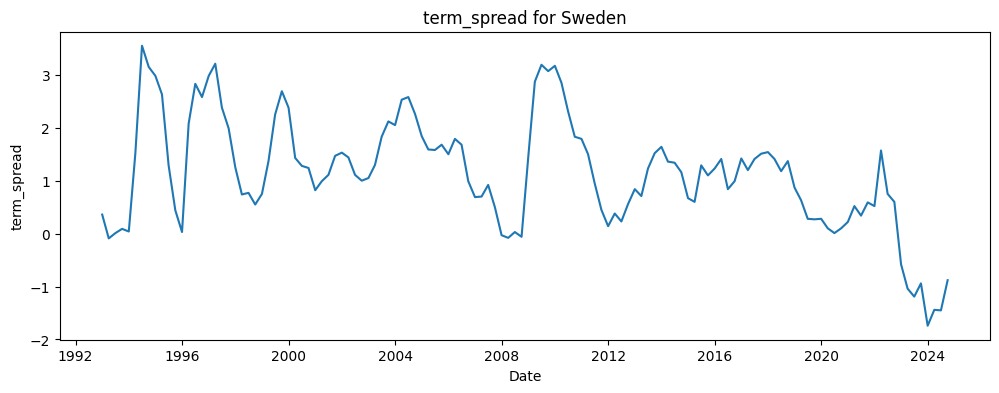

<Figure size 1200x400 with 0 Axes>

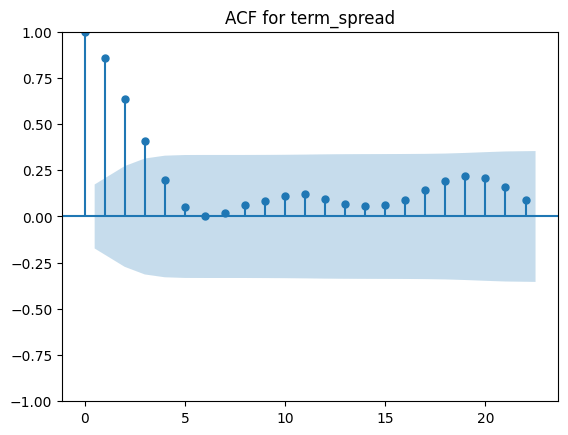

<Figure size 1200x400 with 0 Axes>

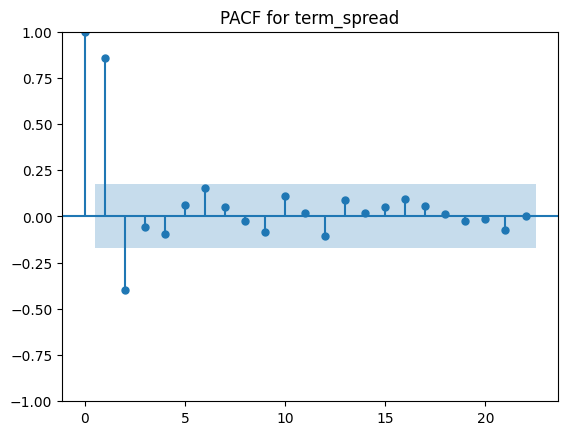

-------------------------- Correlogram for term_spread --------------------------
    lag       ACF      PACF  Ljung-Box Q stat       p-value
0     1  0.858928  0.865692         96.663711  8.216142e-23
1     2  0.633311 -0.423256        149.632034  3.219708e-33
2     3  0.405997 -0.051234        171.574658  5.817181e-37
3     4  0.199372 -0.104161        176.908731  3.438418e-37
4     5  0.053992  0.076446        177.303098  2.015311e-36
5     6  0.002949  0.170027        177.304284  1.267679e-35
6     7  0.020205  0.050454        177.360426  7.029748e-35
7     8  0.060284 -0.030858        177.864361  2.890687e-34
8     9  0.083507 -0.101429        178.839466  8.851470e-34
9    10  0.108927  0.132768        180.512652  1.833723e-33
10   11  0.123396  0.018219        182.678205  2.868923e-33
11   12  0.094413 -0.123790        183.956878  6.569233e-33
12   13  0.067677  0.114375        184.619611  1.933634e-32
13   14  0.058340  0.016533        185.116406  5.921168e-32
14   15  0.061635 

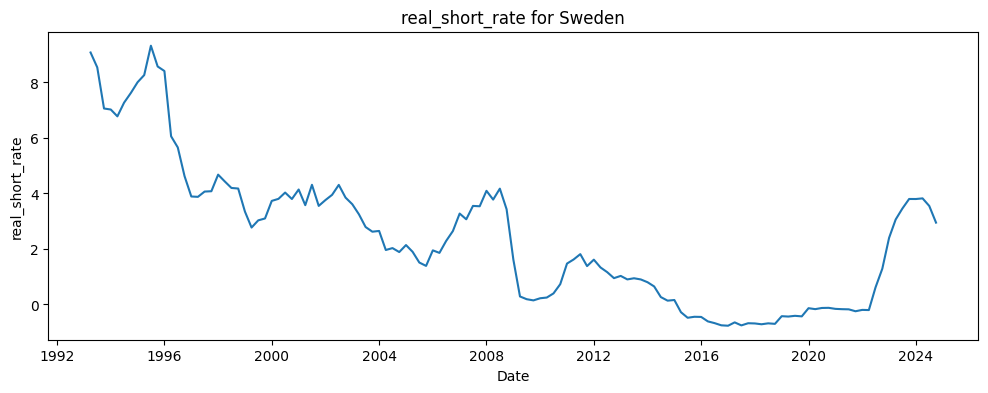

<Figure size 1200x400 with 0 Axes>

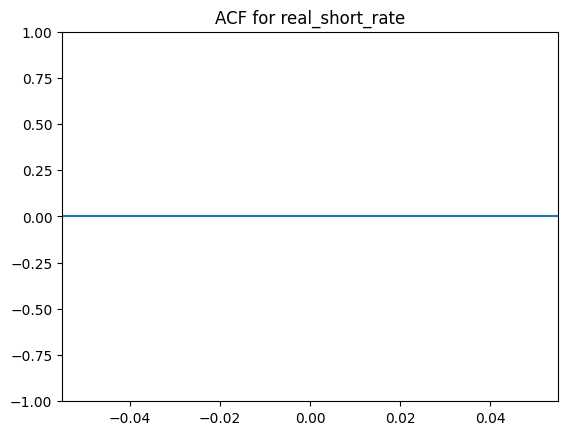

<Figure size 1200x400 with 0 Axes>

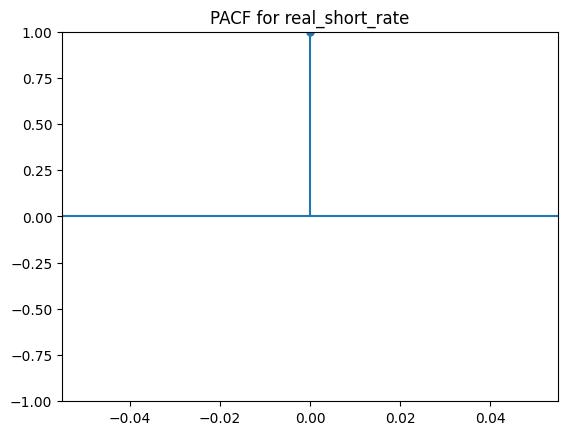

-------------------------- Correlogram for real_short_rate --------------------------
    lag  ACF  PACF  Ljung-Box Q stat  p-value
0     1  NaN   NaN               NaN      NaN
1     2  NaN   NaN               NaN      NaN
2     3  NaN   NaN               NaN      NaN
3     4  NaN   NaN               NaN      NaN
4     5  NaN   NaN               NaN      NaN
5     6  NaN   NaN               NaN      NaN
6     7  NaN   NaN               NaN      NaN
7     8  NaN   NaN               NaN      NaN
8     9  NaN   NaN               NaN      NaN
9    10  NaN   NaN               NaN      NaN
10   11  NaN   NaN               NaN      NaN
11   12  NaN   NaN               NaN      NaN
12   13  NaN   NaN               NaN      NaN
13   14  NaN   NaN               NaN      NaN
14   15  NaN   NaN               NaN      NaN
15   16  NaN   NaN               NaN      NaN
16   17  NaN   NaN               NaN      NaN
17   18  NaN   NaN               NaN      NaN
18   19  NaN   NaN               NaN    

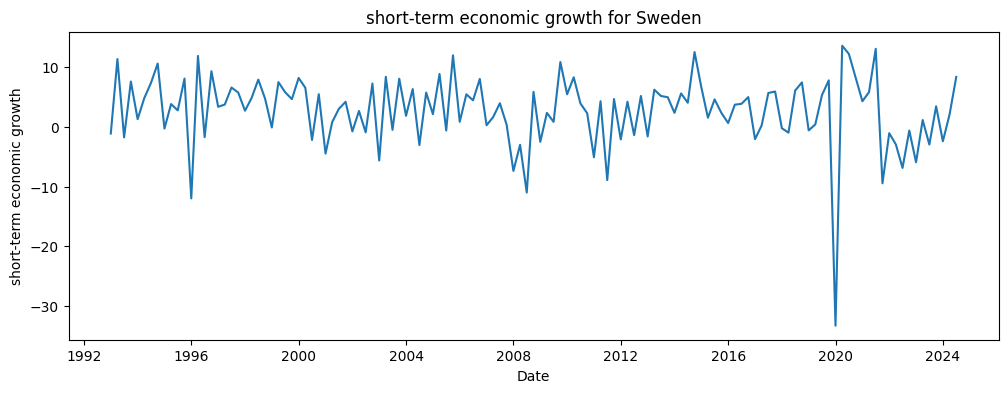

<Figure size 1200x400 with 0 Axes>

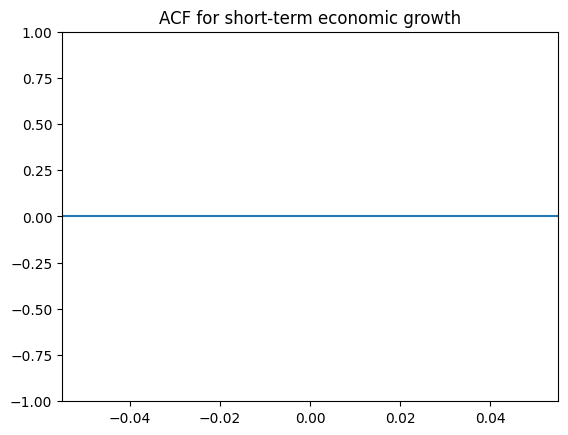

<Figure size 1200x400 with 0 Axes>

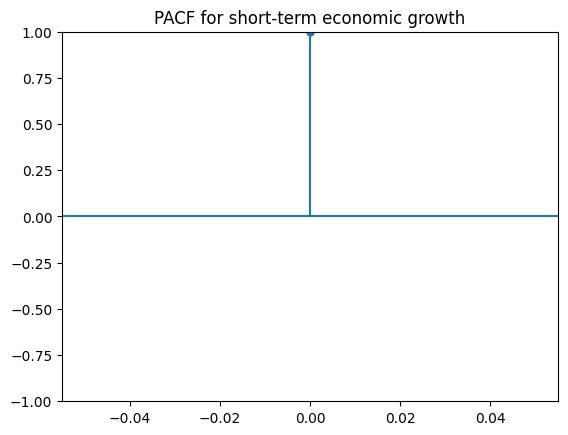

-------------------------- Correlogram for short-term economic growth --------------------------
    lag  ACF  PACF  Ljung-Box Q stat  p-value
0     1  NaN   NaN               NaN      NaN
1     2  NaN   NaN               NaN      NaN
2     3  NaN   NaN               NaN      NaN
3     4  NaN   NaN               NaN      NaN
4     5  NaN   NaN               NaN      NaN
5     6  NaN   NaN               NaN      NaN
6     7  NaN   NaN               NaN      NaN
7     8  NaN   NaN               NaN      NaN
8     9  NaN   NaN               NaN      NaN
9    10  NaN   NaN               NaN      NaN
10   11  NaN   NaN               NaN      NaN
11   12  NaN   NaN               NaN      NaN
12   13  NaN   NaN               NaN      NaN
13   14  NaN   NaN               NaN      NaN
14   15  NaN   NaN               NaN      NaN
15   16  NaN   NaN               NaN      NaN
16   17  NaN   NaN               NaN      NaN
17   18  NaN   NaN               NaN      NaN
18   19  NaN   NaN           

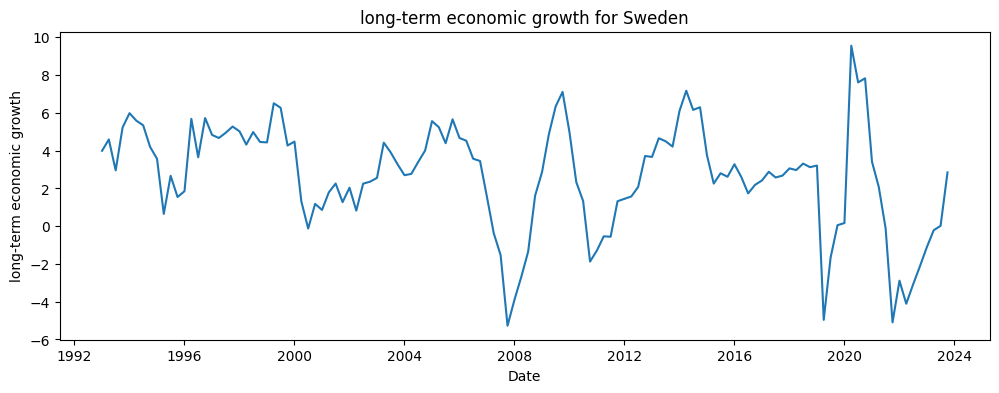

<Figure size 1200x400 with 0 Axes>

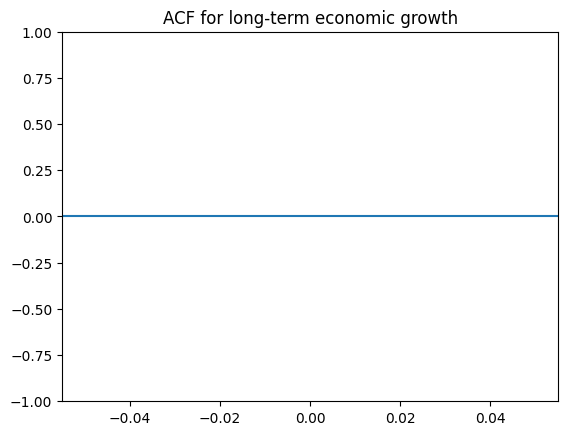

<Figure size 1200x400 with 0 Axes>

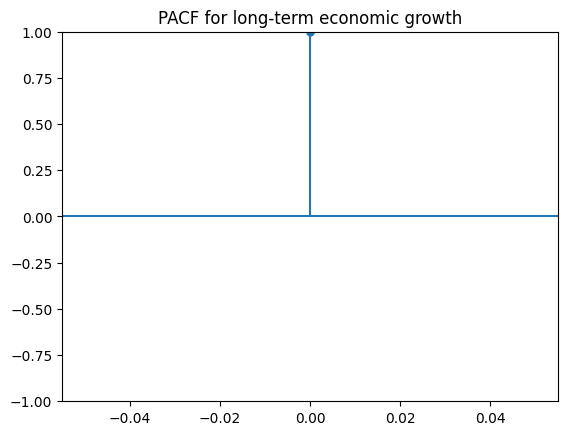

-------------------------- Correlogram for long-term economic growth --------------------------
    lag  ACF  PACF  Ljung-Box Q stat  p-value
0     1  NaN   NaN               NaN      NaN
1     2  NaN   NaN               NaN      NaN
2     3  NaN   NaN               NaN      NaN
3     4  NaN   NaN               NaN      NaN
4     5  NaN   NaN               NaN      NaN
5     6  NaN   NaN               NaN      NaN
6     7  NaN   NaN               NaN      NaN
7     8  NaN   NaN               NaN      NaN
8     9  NaN   NaN               NaN      NaN
9    10  NaN   NaN               NaN      NaN
10   11  NaN   NaN               NaN      NaN
11   12  NaN   NaN               NaN      NaN
12   13  NaN   NaN               NaN      NaN
13   14  NaN   NaN               NaN      NaN
14   15  NaN   NaN               NaN      NaN
15   16  NaN   NaN               NaN      NaN
16   17  NaN   NaN               NaN      NaN
17   18  NaN   NaN               NaN      NaN
18   19  NaN   NaN            

In [ ]:
#ACF and PACF for the transformed variables


for var in Transformed_Variables.columns:
    y = Transformed_Variables[var]

    # Plot the level
    plt.figure(figsize=(12, 4))
    plt.plot(y)
    plt.title(f'{var} for Sweden')
    plt.ylabel(var)
    plt.xlabel('Date')
    plt.show()

    # Plot ACF
    plt.figure(figsize=(12, 4))
    plot_acf(y)
    plt.title(f'ACF for {var}')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 4))
    plot_pacf(y, method='ywm')
    plt.title(f'PACF for {var}')
    plt.show()

    # Create and print correlogram
    lagnum = 20
    acf, q, pval = tsa.acf(y, nlags=lagnum, qstat=True)
    pacf = tsa.pacf(y, nlags=lagnum)
    correlogram = pd.DataFrame({
        'lag': list(range(1, lagnum + 1)),
        'ACF': acf[1:],
        'PACF': pacf[1:],
        'Ljung-Box Q stat': q,
        'p-value': pval
    })

    print(f"-------------------------- Correlogram for {var} --------------------------")
    print(correlogram)
    print("-----------------------------------------------------------------")


In [ ]:
# Calculate mean and standard deviation for the transformed variables
summary_stats_transformed = Transformed_Variables.agg(['mean', 'std'])

# Display the summary statistics
summary_stats_transformed


,unemployement rate(%),real_GDP,term_spread,real_short_rate,short-term economic growth,long-term economic growth
mean,7.694792,691313.124149,1.135625,2.416949,2.687239,2.663169
std,1.160825,168653.192311,1.048491,2.525515,5.955383,2.833108


In [ ]:
# Stationarity testing for Transformed Variables

for var in Transformed_Variables.columns:
    y = Transformed_Variables[var].dropna()  # Drop NaN values before ADF test

    print("-----------------------------------------------------------------")
    print(f"Augmented Dickey-Fuller (ADF) test for {var}")
    print("    H0: unit root (variable is NOT stationary)")
    print("    H1: no unit root (variable is stationary)")
    print("-----------------------------------------------------------------")
    results = tsa.adfuller(y)
    print("\n (1) ADF test for", var, "series")
    print('ADF test stat: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Critical values:')
    for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value))

    print("-----------------------------------------------------------------")
    print(f"\n (2) ADF test for {var} series - various underlying models:")
    res = tsa.adfuller(y, regression='c', autolag='AIC')
    print(f"    (1) ADF p-value (const):                       {res[1]:.4f}")
    res = tsa.adfuller(y, regression='ct', autolag='AIC')
    print(f"    (2) ADF p-value (const + trend):               {res[1]:.4f}")
    res = tsa.adfuller(y, regression='ctt', autolag='AIC')
    print(f"    (3) ADF p-value (const + trend + quad trend):   {res[1]:.4f}")
    res = tsa.adfuller(y, regression='n', autolag='AIC')
    print(f"    (4) ADF p-value (no const + no trend):         {res[1]:.4f}")
    print("-----------------------------------------------------------------")


-----------------------------------------------------------------
Augmented Dickey-Fuller (ADF) test for unemployement rate(%)
    H0: unit root (variable is NOT stationary)
    H1: no unit root (variable is stationary)
-----------------------------------------------------------------

 (1) ADF test for unemployement rate(%) series
ADF test stat: -3.829696
p-value: 0.002618
Critical values:
	1%: -3.484
	5%: -2.885
	10%: -2.579
-----------------------------------------------------------------

 (2) ADF test for unemployement rate(%) series - various underlying models:
    (1) ADF p-value (const):                       0.0026
    (2) ADF p-value (const + trend):               0.0205
    (3) ADF p-value (const + trend + quad trend):   0.0522
    (4) ADF p-value (no const + no trend):         0.5457
-----------------------------------------------------------------
-----------------------------------------------------------------
Augmented Dickey-Fuller (ADF) test for real_GDP
    H0: unit 

In [ ]:
# Unemployment rate is stationary

# REAL GDP is not stationary

# short term economic growth is stationary

# long term economic growth is not stationary

# term spread and real short rate are not statationary

# for the variables above, const was the underlyind model, except for RealGDP+
# REAL short rate for which it was trend +const

In [ ]:
# Final Transformations based on ADF tests
stationary_variables = Transformed_Variables.copy()

# realGDP: log difference
stationary_variables['real_GDP_logdiff'] = np.log(stationary_variables['real_GDP']).diff()

# long-term economic growth: first difference
stationary_variables['long-term economic growth_diff'] = stationary_variables['long-term economic growth'].diff()

# term spread: first difference
stationary_variables['term_spread_diff'] = stationary_variables['term_spread'].diff()

# real short rate: first difference
stationary_variables['real_short_rate_diff'] = stationary_variables['real_short_rate'].diff()

# unemployment rate and short-term economic growth: no transformation (already stationary)

Stationary_Variables = stationary_variables.iloc[:, [0,4,6,7, 8, 9]]

Stationary_Variables



,unemployement rate(%),short-term economic growth,real_GDP_logdiff,long-term economic growth_diff,term_spread_diff,real_short_rate_diff
observation_date,,,,,,
1993-01-01,7.700000,-1.130834,NaN,NaN,NaN,NaN
1993-04-01,9.033334,11.327073,-0.002827,0.600640,-0.45,NaN
1993-07-01,9.633333,-1.783257,0.028318,-1.637915,0.10,-0.536445
1993-10-01,9.800000,7.561528,-0.004458,2.275179,0.08,-1.481739
1994-01-01,9.733334,1.271726,0.018904,0.753507,-0.05,-0.037084
...,...,...,...,...,...,...
2023-10-01,8.066667,3.426219,-0.007445,2.830022,0.25,0.344831
2024-01-01,8.233334,-2.428702,0.008566,NaN,-0.80,-0.001287
2024-04-01,8.300000,2.054786,-0.006072,NaN,0.30,0.023222


In [ ]:
# Stationarity Testing for the rest of the variables

for var in Stationary_Variables.columns:
    y = Stationary_Variables[var].dropna()  # Drop NaN values before ADF test

    print("-----------------------------------------------------------------")
    print(f"Augmented Dickey-Fuller (ADF) test for {var}")
    print("    H0: unit root (variable is NOT stationary)")
    print("    H1: no unit root (variable is stationary)")
    print("-----------------------------------------------------------------")
    results = tsa.adfuller(y)
    print("\n (1) ADF test for", var, "series")
    print('ADF test stat: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Critical values:')
    for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value))

    print("-----------------------------------------------------------------")
    print(f"\n (2) ADF test for {var} series - various underlying models:")
    res = tsa.adfuller(y, regression='c', autolag='AIC')
    print(f"    (1) ADF p-value (const):                       {res[1]:.4f}")
    res = tsa.adfuller(y, regression='ct', autolag='AIC')
    print(f"    (2) ADF p-value (const + trend):               {res[1]:.4f}")
    res = tsa.adfuller(y, regression='ctt', autolag='AIC')
    print(f"    (3) ADF p-value (const + trend + quad trend):   {res[1]:.4f}")
    res = tsa.adfuller(y, regression='n', autolag='AIC')
    print(f"    (4) ADF p-value (no const + no trend):         {res[1]:.4f}")
    print("-----------------------------------------------------------------")

-----------------------------------------------------------------
Augmented Dickey-Fuller (ADF) test for unemployement rate(%)
    H0: unit root (variable is NOT stationary)
    H1: no unit root (variable is stationary)
-----------------------------------------------------------------

 (1) ADF test for unemployement rate(%) series
ADF test stat: -3.829696
p-value: 0.002618
Critical values:
	1%: -3.484
	5%: -2.885
	10%: -2.579
-----------------------------------------------------------------

 (2) ADF test for unemployement rate(%) series - various underlying models:
    (1) ADF p-value (const):                       0.0026
    (2) ADF p-value (const + trend):               0.0205
    (3) ADF p-value (const + trend + quad trend):   0.0522
    (4) ADF p-value (no const + no trend):         0.5457
-----------------------------------------------------------------
-----------------------------------------------------------------
Augmented Dickey-Fuller (ADF) test for short-term economic gr

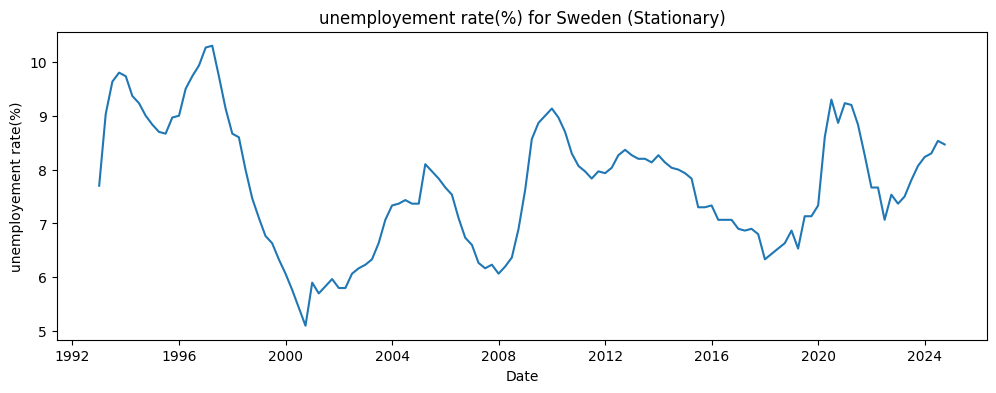

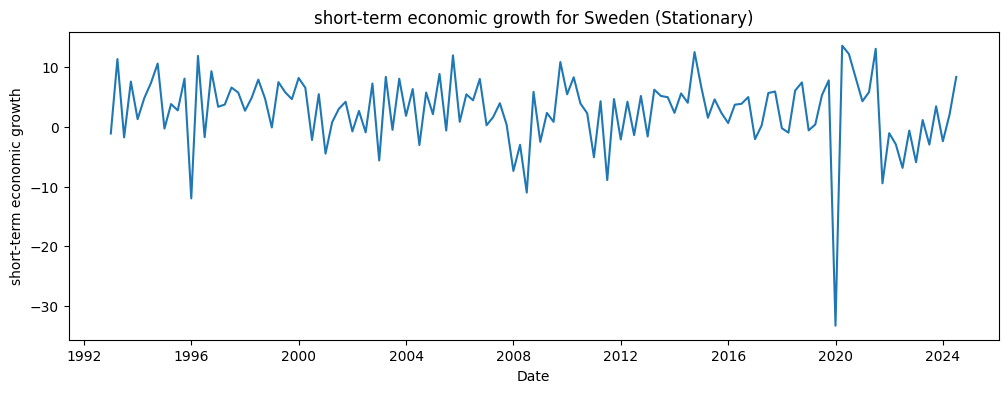

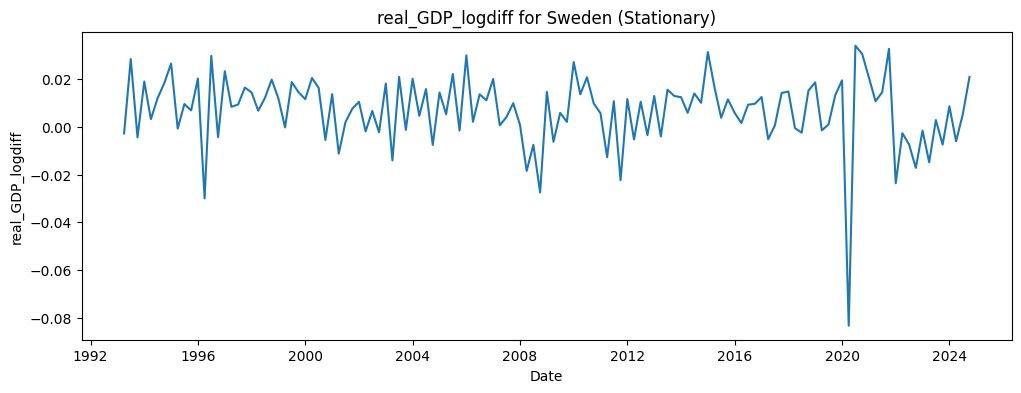

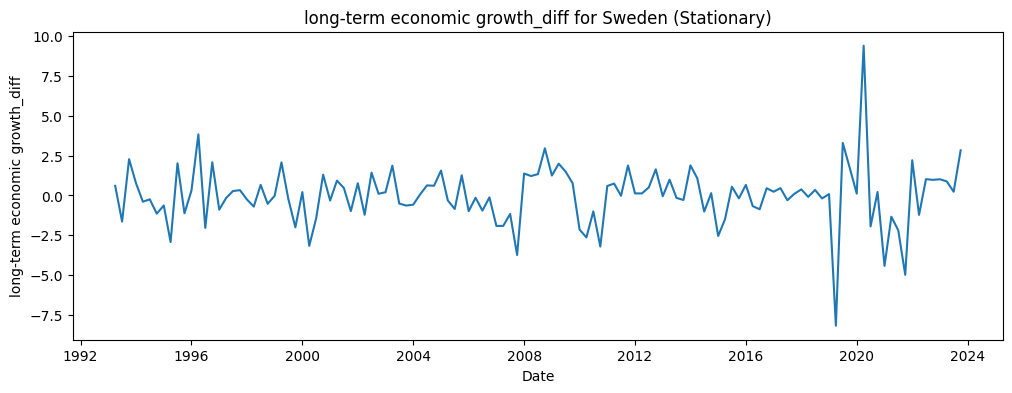

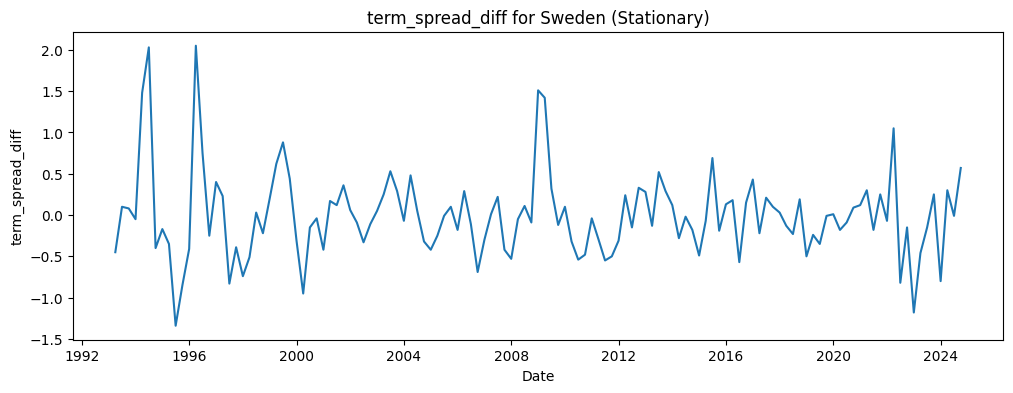

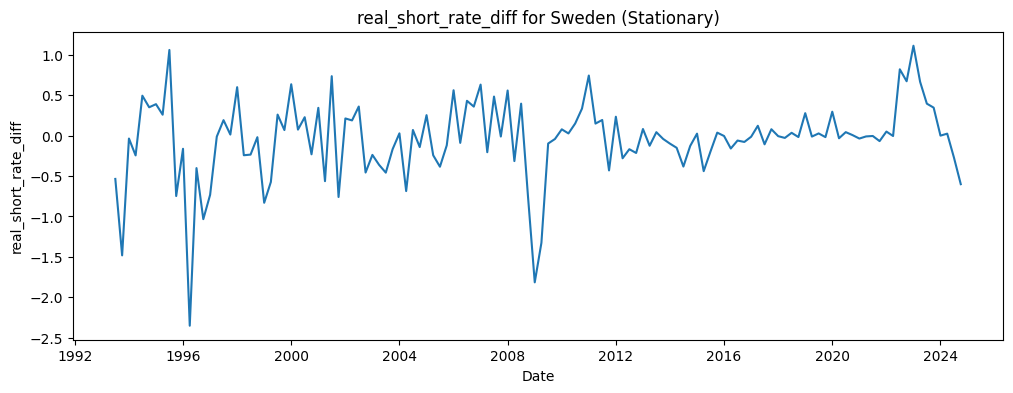

In [ ]:
# prompt: plot the stationary variables

# Plotting the stationary variables
for var in Stationary_Variables.columns:
  y = Stationary_Variables[var]

  # Plot the level
  plt.figure(figsize=(12, 4))
  plt.plot(y)
  plt.title(f'{var} for Sweden (Stationary)')
  plt.ylabel(var)
  plt.xlabel('Date')
  plt.show()

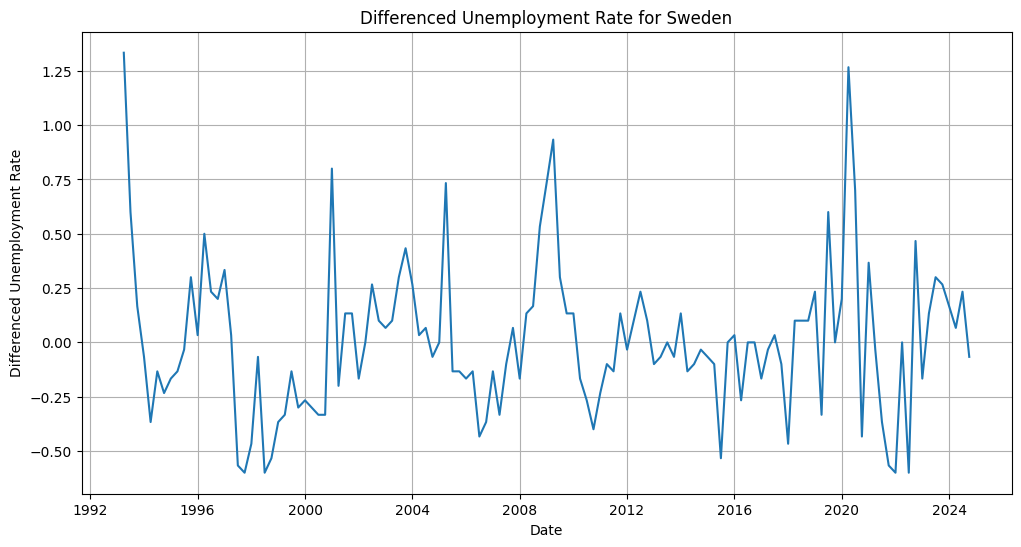


-----------------------------------------------------------------
Augmented Dickey-Fuller (ADF) test for Differenced Unemployment Rate
    H0: unit root (variable is NOT stationary)
    H1: no unit root (variable is stationary)
-----------------------------------------------------------------
ADF Statistic: -4.9384
p-value: 0.0000
Critical Values:
	1%: -3.486
	5%: -2.886
	10%: -2.580
-----------------------------------------------------------------


In [ ]:
# prompt: tak diff of unemployment then plot it

# Take the difference of the unemployment rate
unemployment_diff = df_cleaned['unemployement rate(%)'].diff().dropna()

# Plot the differenced unemployment rate
plt.figure(figsize=(12, 6))
plt.plot(unemployment_diff)
plt.title('Differenced Unemployment Rate for Sweden')
plt.ylabel('Differenced Unemployment Rate')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Perform ADF test on the differenced unemployment rate
print("\n-----------------------------------------------------------------")
print("Augmented Dickey-Fuller (ADF) test for Differenced Unemployment Rate")
print("    H0: unit root (variable is NOT stationary)")
print("    H1: no unit root (variable is stationary)")
print("-----------------------------------------------------------------")
adf_diff_unemployment = adfuller(unemployment_diff)
print(f"ADF Statistic: {adf_diff_unemployment[0]:.4f}")
print(f"p-value: {adf_diff_unemployment[1]:.4f}")
print("Critical Values:")
for key, value in adf_diff_unemployment[4].items():
    print(f"\t{key}: {value:.3f}")
print("-----------------------------------------------------------------")

In [ ]:
# prompt: no just replace the unemployment in stationary variables with the one from above

# Replace 'unemployment rate' in Stationary_Variables with the differenced unemployment rate
# We first need to create a DataFrame for the differenced unemployment rate with the correct index
unemployment_diff_df = pd.DataFrame(unemployment_diff, columns=['unemployement rate(%)'])

# Drop the original 'unemployement rate(%)' column from Stationary_Variables
if 'unemployement rate(%)' in Stationary_Variables.columns:
  Stationary_Variables = Stationary_Variables.drop('unemployement rate(%)', axis=1)

# Join the differenced unemployment rate back to Stationary_Variables
# Ensure the join is done on the index
Stationary_Variables = Stationary_Variables.join(unemployment_diff_df)

# Reorder columns if necessary to match the original order, if desired
# You might want to explicitly list the column order if it matters
# Example: Assuming you want the order to be unemployment_diff, real_GDP_logdiff, etc.
# column_order = ['unemployement rate(%)', 'real_GDP_logdiff', 'long-term economic growth_diff', 'term_spread_diff', 'real_short_rate_diff', 'short-term economic growth']
# Stationary_Variables = Stationary_Variables[column_order]

Stationary_Variables


,short-term economic growth,real_GDP_logdiff,long-term economic growth_diff,term_spread_diff,real_short_rate_diff,unemployement rate(%)
observation_date,,,,,,
1993-01-01,-1.130834,NaN,NaN,NaN,NaN,NaN
1993-04-01,11.327073,-0.002827,0.600640,-0.45,NaN,1.333334
1993-07-01,-1.783257,0.028318,-1.637915,0.10,-0.536445,0.599999
1993-10-01,7.561528,-0.004458,2.275179,0.08,-1.481739,0.166667
1994-01-01,1.271726,0.018904,0.753507,-0.05,-0.037084,-0.066666
...,...,...,...,...,...,...
2023-10-01,3.426219,-0.007445,2.830022,0.25,0.344831,0.266667
2024-01-01,-2.428702,0.008566,NaN,-0.80,-0.001287,0.166667
2024-04-01,2.054786,-0.006072,NaN,0.30,0.023222,0.066666


In [ ]:
# Specify the output Excel filename
output_excel_filename = 'Differenced_Transformed_Variables.xlsx'

# Export the DataFrame to Excel
Stationary_Variables.dropna().to_excel(output_excel_filename)

from google.colab import files
files.download(output_excel_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Target variables
y1 = Stationary_Variables['short-term economic growth'].dropna()
y2 = Stationary_Variables['long-term economic growth_diff'].dropna()

# Model selection function
def find_best_arima(y, max_p=3, max_q=3, d=0):
    best_aic = float('inf')
    best_order = None
    best_model = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(y, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
                    best_model = results
            except Exception as e:
                continue

    return best_order, best_model

# --- Run for y1 ---
order1, model1_results = find_best_arima(y1)
print(f'Best ARIMA model for Yt+1 (short-term growth): order={order1}')
print(model1_results.summary())
print('----------------------------------------------------------------------------------------------\n')

# Get residuals
eps1 = model1_results.resid

# --- Run for y2 ---
order2, model2_results = find_best_arima(y2)
print(f'Best ARIMA model for Zt+4 (long-term growth diff): order={order2}')
print(model2_results.summary())
print('----------------------------------------------------------------------------------------------\n')

# Get residuals
eps2 = model2_results.resid

Best ARIMA model for Yt+1 (short-term growth): order=(1, 0, 1)
                                   SARIMAX Results                                    
Dep. Variable:     short-term economic growth   No. Observations:                  127
Model:                         ARIMA(1, 0, 1)   Log Likelihood                -397.601
Date:                        Mon, 26 May 2025   AIC                            803.202
Time:                                09:46:17   BIC                            814.579
Sample:                            01-01-1993   HQIC                           807.824
                                 - 07-01-2024                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7046      0.591      4.579      0.000       1.547       3.862
ar.L

IN-SAMPLE PREDICTION (IS) 

We use FULL SAMPLE to estimate the prediction model
Y1 = short-term economic growth
Y2 = long-term economic growth
------------------------------------------------------

(1) Plot: observed vs predicted (fitted) values of Y



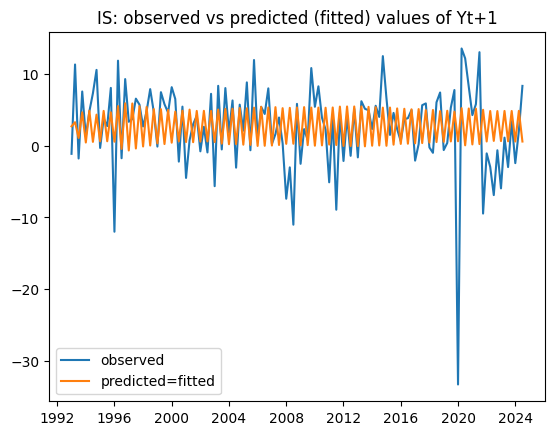

------------------------------------------------------

------------------------------------------------------

(1) Plot: observed vs predicted (fitted) values of Y



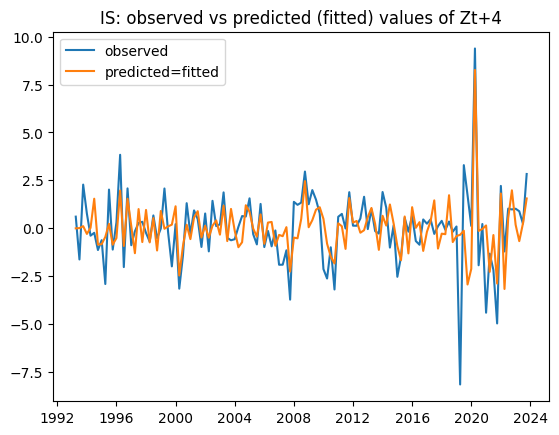

------------------------------------------------------

(2) IS: observed vs predicted (fitted) values of Yt+1 

            y1_observed  y1_predicted
1993-01-01    -1.130834      2.704611
1993-04-01    11.327073      3.281022
1993-07-01    -1.783257      1.077150
1993-10-01     7.561528      4.661984
1994-01-01     1.271726      0.447559
...                 ...           ...
2023-07-01    -2.977937      0.611912
2023-10-01     3.426219      4.843061
2024-01-01    -2.428702      0.585479
2024-04-01     2.054786      4.861838
2024-07-01     8.342149      0.584600

[127 rows x 2 columns]
------------------------------------------------------

(2) IS: observed vs predicted (fitted) values of Zt+1 

            y2_observed  y2_predicted
1993-04-01     0.600640     -0.010565
1993-07-01    -1.637915      0.001167
1993-10-01     2.275179      0.102610
1994-01-01     0.753507     -0.302922
1994-04-01    -0.395170      0.013879
...                 ...           ...
2022-10-01     0.977204      1

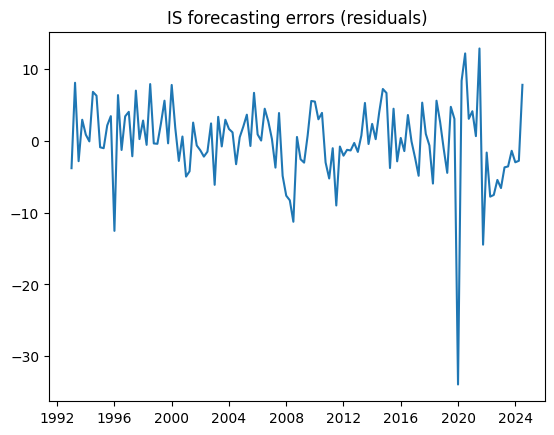

------------------------------------------------------

(3) Plot: IS forecasting errors (residuals)



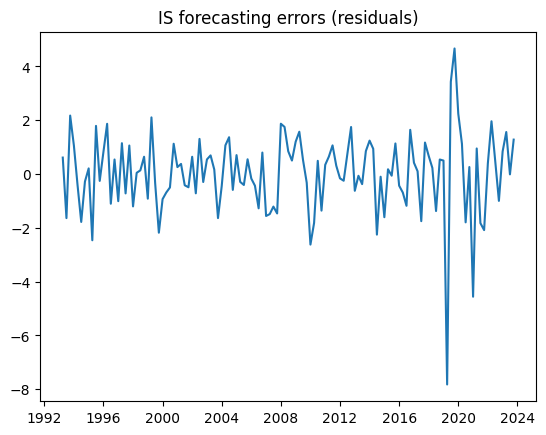

------------------------------------------------------

(4) Summary statistics of the IS forecasting error (residuals)

count    127.000000
mean      -0.002331
std        5.547150
min      -33.918361
25%       -2.700052
50%        0.008323
75%        3.342369
max       12.815126
dtype: float64
------------------------------------------------------

(4) Summary statistics of the IS forecasting error (residuals)

count    123.000000
mean       0.005937
std        1.478503
min       -7.823818
25%       -0.703737
50%        0.176318
75%        0.849614
max        4.666604
dtype: float64
------------------------------------------------------



In [ ]:
# IS Prediction for Yt+1 and Zt+4

print('IN-SAMPLE PREDICTION (IS) \n')
print('We use FULL SAMPLE to estimate the prediction model')
print('Y1 = short-term economic growth')
y1_predicted = model1_results.predict()
print('Y2 = long-term economic growth')
y2_predicted = model2_results.predict()


# (1) plot
print('------------------------------------------------------\n')
print('(1) Plot: observed vs predicted (fitted) values of Y\n')
plt.plot(y1.index, y1.values, label='observed')
plt.plot(y1_predicted.index, y1_predicted.values, label='predicted=fitted')
plt.legend(loc='best')
plt.title('IS: observed vs predicted (fitted) values of Yt+1')
plt.show()
print('------------------------------------------------------\n')
print('------------------------------------------------------\n')
print('(1) Plot: observed vs predicted (fitted) values of Y\n')
plt.plot(y2.index, y2.values, label='observed')
plt.plot(y2_predicted.index, y2_predicted.values, label='predicted=fitted')
plt.legend(loc='best')
plt.title('IS: observed vs predicted (fitted) values of Zt+4')
plt.show()
print('------------------------------------------------------\n')


# (2) observed and predicted=fitted values of Y into one df
y1_obs_pred = pd.DataFrame({'y1_observed':y1,
                            'y1_predicted':y1_predicted})

print('(2) IS: observed vs predicted (fitted) values of Yt+1 \n')
print(y1_obs_pred)
print('------------------------------------------------------\n')
y2_obs_pred = pd.DataFrame({'y2_observed':y2,
                            'y2_predicted':y2_predicted})

print('(2) IS: observed vs predicted (fitted) values of Zt+1 \n')
print(y2_obs_pred)
print('------------------------------------------------------\n')



# (3) IS forecasting errors = residuals
eps1 = model1_results.resid
print('(3) Plot: IS forecasting errors (residuals)\n')
plt.plot(eps1)
plt.title('IS forecasting errors (residuals)')
plt.show()
print('------------------------------------------------------\n')
eps2 = model2_results.resid
print('(3) Plot: IS forecasting errors (residuals)\n')
plt.plot(eps2)
plt.title('IS forecasting errors (residuals)')
plt.show()
print('------------------------------------------------------\n')


# (4) Summary statistics for Is forecasting error = residuals
print('(4) Summary statistics of the IS forecasting error (residuals)\n')
print(eps1.describe())
print('------------------------------------------------------\n')
print('(4) Summary statistics of the IS forecasting error (residuals)\n')
print(eps2.describe())
print('------------------------------------------------------\n')


------------------------------------------------------
(1) Forecast for Y+1: over the future 24 quarters:

short-term economic growth      mean   mean_se  mean_ci_lower  mean_ci_upper
2024-10-01                  4.723646  5.498051      -6.052336      15.499628
2025-01-01                  0.686460  5.498441     -10.090286      11.463206
2025-04-01                  4.721877  5.498830      -6.055633      15.499386
2025-07-01                  0.688229  5.499219     -10.090043      11.466501
2025-10-01                  4.720108  5.499608      -6.058925      15.499142
2026-01-01                  0.689996  5.499996     -10.089799      11.469791
2026-04-01                  4.718342  5.500384      -6.062214      15.498897
2026-07-01                  0.691762  5.500772     -10.089553      11.473077
2026-10-01                  4.716577  5.501159      -6.065497      15.498651
2027-01-01                  0.693526  5.501546     -10.089306      11.476359
2027-04-01                  4.714814  5.501933

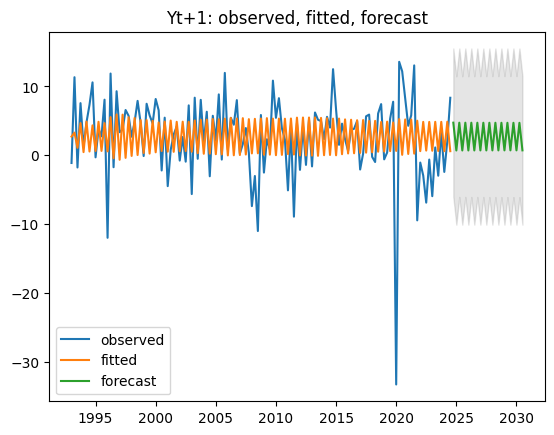

-------------------------------------------------------------------
(3) Plotting Yt+1: observed, fitted, forecast - subsample view


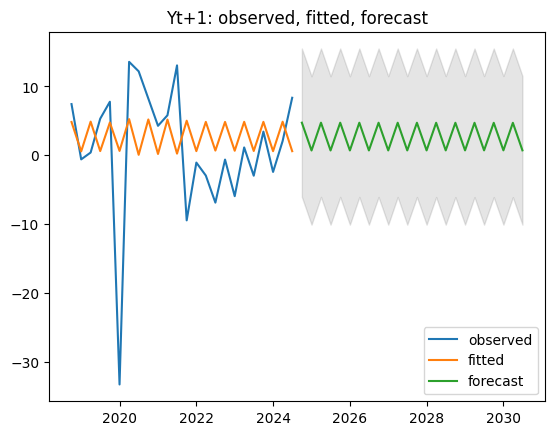

------------------------------------------------------
(4) Forecast for Zt+4: over the future 24 quarters:

long-term economic growth_diff      mean   mean_se  mean_ci_lower  \
2024-01-01                      0.314440  1.451703      -2.530846   
2024-04-01                     -0.051149  1.469827      -2.931958   
2024-07-01                      1.053829  1.583533      -2.049837   
2024-10-01                     -0.798966  1.761286      -4.251024   
2025-01-01                      0.271218  1.915073      -3.482256   
2025-04-01                      0.007916  1.945028      -3.804268   
2025-07-01                     -0.106785  1.945360      -3.919621   
2025-10-01                      0.056378  1.946703      -3.759090   
2026-01-01                     -0.032784  1.947783      -3.850370   
2026-04-01                     -0.013418  1.947980      -3.831388   
2026-07-01                     -0.001929  1.947981      -3.819900   
2026-10-01                     -0.016225  1.947992      -3.83421

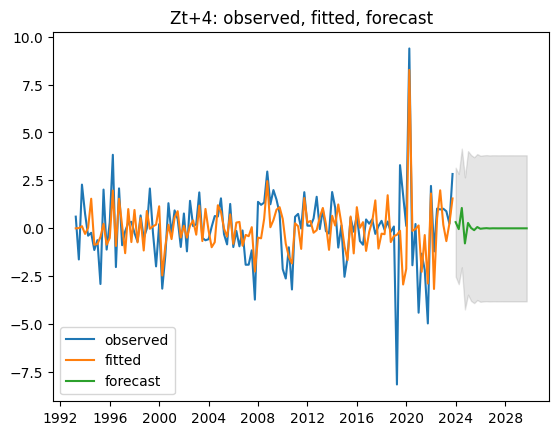

-------------------------------------------------------------------
(6) Plotting Zt+4: observed, fitted, forecast - subsample view


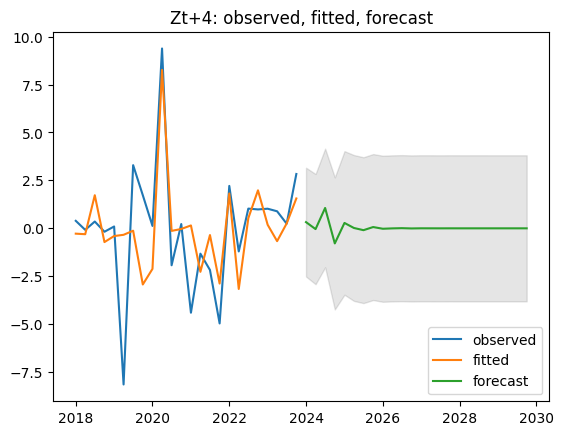

In [ ]:
# Forecasting future values of Yt+1 and Zt+4 from the IS model

h_max = 24

# forecast with se and CI
fcast_results1 = model1_results.get_forecast(steps=h_max)
fcast_full1 = fcast_results1.summary_frame()
y1_forec = fcast_full1['mean']
y1_forec_se = fcast_full1['mean_se']
y1_forec_LB = fcast_full1['mean_ci_lower']
y1_forec_UB = fcast_full1['mean_ci_upper']
print('------------------------------------------------------')
print('(1) Forecast for Y+1: over the future',h_max,'quarters:\n')
print(fcast_full1)
print('------------------------------------------------------\n')


y1_observed = y1_obs_pred['y1_observed']
y1_predicted = y1_obs_pred['y1_predicted']


# Plot the results - full dataset
plt.plot(y1_observed.index, y1_observed.values, label='observed')
plt.plot(y1_predicted.index, y1_predicted.values, label='fitted')
plt.plot(y1_forec.index, y1_forec.values, label='forecast')
plt.fill_between(y1_forec_LB.index, y1_forec_LB, y1_forec_UB, color='k', alpha=0.1)
plt.legend(loc='lower left')
plt.title('Yt+1: observed, fitted, forecast')
print('-------------------------------------------------------------------')
print('(2) Plotting Yt+1: observed, fitted, forecast - full sample view')
plt.show()


# Plot the results - subset of full dataset
set_last_num_obs = 24
plt.plot(y1_observed.index[-set_last_num_obs:], y1_observed.values[-set_last_num_obs :], label='observed')
plt.plot(y1_predicted.index[-set_last_num_obs :], y1_predicted.values[-set_last_num_obs :], label='fitted')
plt.plot(y1_forec.index, y1_forec.values, label='forecast')
plt.fill_between(y1_forec_LB.index, y1_forec_LB, y1_forec_UB, color='k', alpha=0.1)
plt.legend(loc='lower right')
plt.title('Yt+1: observed, fitted, forecast')
print('-------------------------------------------------------------------')
print('(3) Plotting Yt+1: observed, fitted, forecast - subsample view')
plt.show()

# Repeat the same for Zt+4

fcast_results2 = model2_results.get_forecast(steps=h_max)
fcast_full2 = fcast_results2.summary_frame()
y2_forec = fcast_full2['mean']
y2_forec_se = fcast_full2['mean_se']
y2_forec_LB = fcast_full2['mean_ci_lower']
y2_forec_UB = fcast_full2['mean_ci_upper']
print('------------------------------------------------------')
print('(4) Forecast for Zt+4: over the future',h_max,'quarters:\n')
print(fcast_full2)
print('------------------------------------------------------\n')


y2_observed = y2_obs_pred['y2_observed']
y2_predicted = y2_obs_pred['y2_predicted']


plt.plot(y2_observed.index, y2_observed.values, label='observed')
plt.plot(y2_predicted.index, y2_predicted.values, label='fitted')
plt.plot(y2_forec.index, y2_forec.values, label='forecast')
plt.fill_between(y2_forec_LB.index, y2_forec_LB, y2_forec_UB, color='k', alpha=0.1)
plt.legend(loc='lower left')
plt.title('Zt+4: observed, fitted, forecast')
print('-------------------------------------------------------------------')
print('(5) Plotting Zt+4: observed, fitted, forecast - full sample view')
plt.show()


set_last_num_obs = 24
plt.plot(y2_observed.index[-set_last_num_obs:], y2_observed.values[-set_last_num_obs :], label='observed')
plt.plot(y2_predicted.index[-set_last_num_obs :], y2_predicted.values[-set_last_num_obs :], label='fitted')
plt.plot(y2_forec.index, y2_forec.values, label='forecast')
plt.fill_between(y2_forec_LB.index, y2_forec_LB, y2_forec_UB, color='k', alpha=0.1)
plt.legend(loc='lower right')
plt.title('Zt+4: observed, fitted, forecast')
print('-------------------------------------------------------------------')
print('(6) Plotting Zt+4: observed, fitted, forecast - subsample view')
plt.show()